In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("AI_Human.csv")

In [3]:
df.head()

SyntaxError: unterminated string literal (detected at line 4) (1188534603.py, line 4)

In [4]:
df.shape

(487235, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [6]:
df.isnull().sum()

text         0
generated    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

# EDA Exploratory Data Analysis

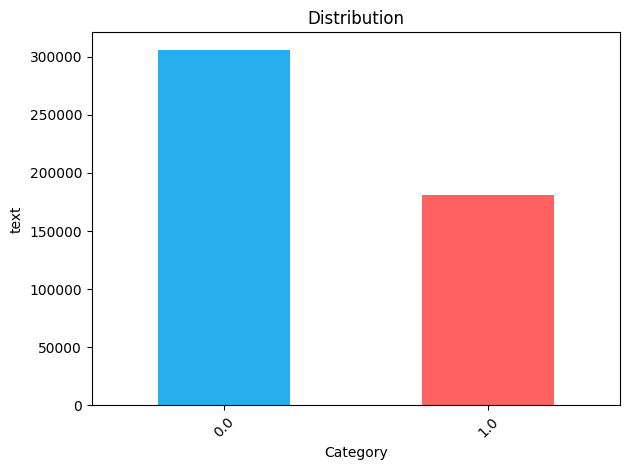

In [8]:
df["generated"].value_counts().plot(kind="bar", color=["#27aeef","#ff6361"])
plt.title('Distribution')
plt.xlabel('Category')
plt.ylabel('text')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
import spacy
import nltk
from tokenizers import Tokenizer
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/kashif/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Extracting the Number of Characters from Text

In [10]:
df["num_characters"] = df["text"].apply(len)

In [11]:
df.head()

,text,generated,num_characters
0,Cars. Cars have been around since they became ...,0.0,3289
1,Transportation is a large necessity in most co...,0.0,2738
2,"""America's love affair with it's vehicles seem...",0.0,4428
3,How often do you ride in a car? Do you drive a...,0.0,4013
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698


## Extracting the Number of Words from Text

In [12]:
tokenizer = Tokenizer.from_pretrained("bert-base-uncased")
def count_words_hf_with_progress_bar(texts, batch_size=1000):
    num_words = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing"):
        batch = texts[i:i + batch_size]
        batch_word_counts = [len(tokenizer.encode(text).tokens) for text in batch]
        num_words.extend(batch_word_counts)
    
    return num_words

/home/kashif/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
df["num_words"] = count_words_hf_with_progress_bar(df["text"].tolist())

Processing: 100%|█████████████████████████████| 488/488 [14:19<00:00,  1.76s/it]


In [14]:
df.head()

,text,generated,num_characters,num_words
0,Cars. Cars have been around since they became ...,0.0,3289,709
1,Transportation is a large necessity in most co...,0.0,2738,569
2,"""America's love affair with it's vehicles seem...",0.0,4428,901
3,How often do you ride in a car? Do you drive a...,0.0,4013,852
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,1090


In [16]:
df.to_csv("cleaned.csv",index=False)

In [4]:
df = pd.read_csv("cleaned.csv")

In [5]:
df.head()

,text,generated,num_characters,num_words,num_sentences
0,Cars. Cars have been around since they became ...,0.0,3289,709,23
1,Transportation is a large necessity in most co...,0.0,2738,569,27
2,"""America's love affair with it's vehicles seem...",0.0,4428,901,48
3,How often do you ride in a car? Do you drive a...,0.0,4013,852,47
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,1090,50


## Extracting the Number of Sentence from Text

In [16]:
df["num_sentences"] = df["text"].apply(lambda x:len(sent_tokenize(x)))

In [17]:
df.head()

,text,generated,num_characters,num_words,num_sentences
0,Cars. Cars have been around since they became ...,0.0,3289,709,23
1,Transportation is a large necessity in most co...,0.0,2738,569,27
2,"""America's love affair with it's vehicles seem...",0.0,4428,901,48
3,How often do you ride in a car? Do you drive a...,0.0,4013,852,47
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,1090,50


In [18]:
df.to_csv("cleaned.csv",index=False)

In [19]:
df = pd.read_csv("cleaned.csv")

In [20]:
df.head()

,text,generated,num_characters,num_words,num_sentences
0,Cars. Cars have been around since they became ...,0.0,3289,709,23
1,Transportation is a large necessity in most co...,0.0,2738,569,27
2,"""America's love affair with it's vehicles seem...",0.0,4428,901,48
3,How often do you ride in a car? Do you drive a...,0.0,4013,852,47
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,1090,50


In [21]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,487235.000000,487235.000000,487235.000000
mean,2269.586592,465.613328,20.238140
std,988.814028,198.246689,8.928255
min,1.000000,2.000000,0.000000
25%,1583.000000,330.000000,14.000000
50%,2102.000000,434.000000,19.000000
75%,2724.000000,559.000000,25.000000
max,18322.000000,2371.000000,134.000000


In [24]:
df[df["generated"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,305797.000000,305797.000000,305797.000000
mean,2354.592838,495.520159,21.270676
std,1082.013088,219.355106,9.875551
min,82.000000,16.000000,1.000000
25%,1543.000000,330.000000,14.000000
50%,2156.000000,457.000000,20.000000
75%,2920.000000,612.000000,27.000000
max,18322.000000,2371.000000,134.000000


In [26]:
df[df["generated"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,181438.000000,181438.000000,181438.000000
mean,2126.316411,415.208126,18.497895
std,787.254863,142.818222,6.698281
min,1.000000,2.000000,0.000000
25%,1654.000000,330.000000,14.000000
50%,2048.000000,408.000000,18.000000
75%,2480.000000,481.000000,22.000000
max,8871.000000,1515.000000,96.000000


<Axes: xlabel='num_characters', ylabel='Count'>

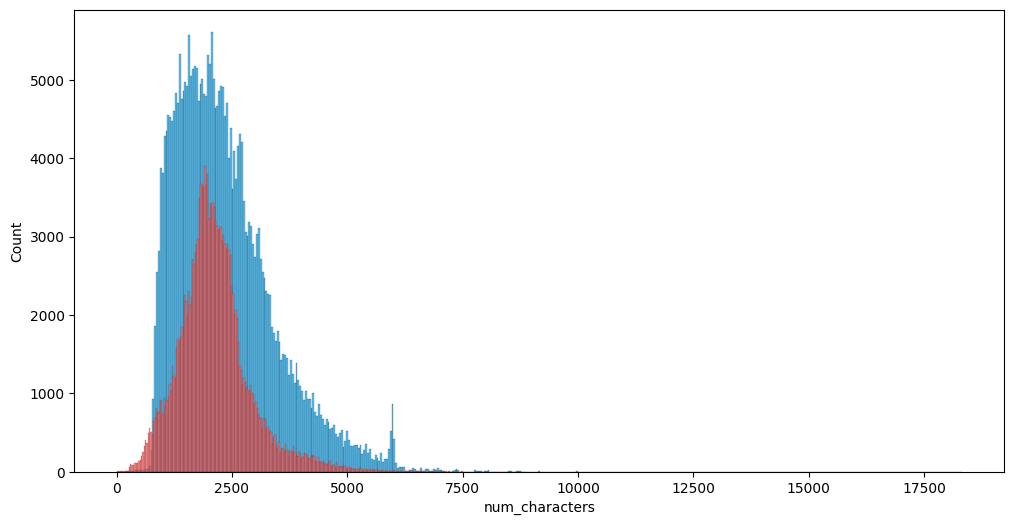

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["generated"]==0]["num_characters"],color="#27aeef")
sns.histplot(df[df["generated"]==1]["num_characters"],color="#ff6361")

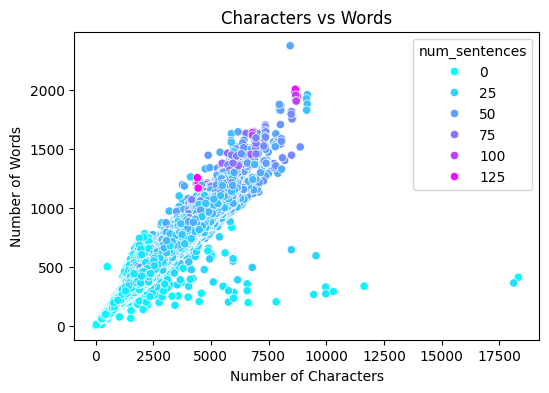

In [44]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='num_characters', y='num_words', data=df,hue="num_sentences",palette="cool")
plt.title('Characters vs Words')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Words')
plt.show()

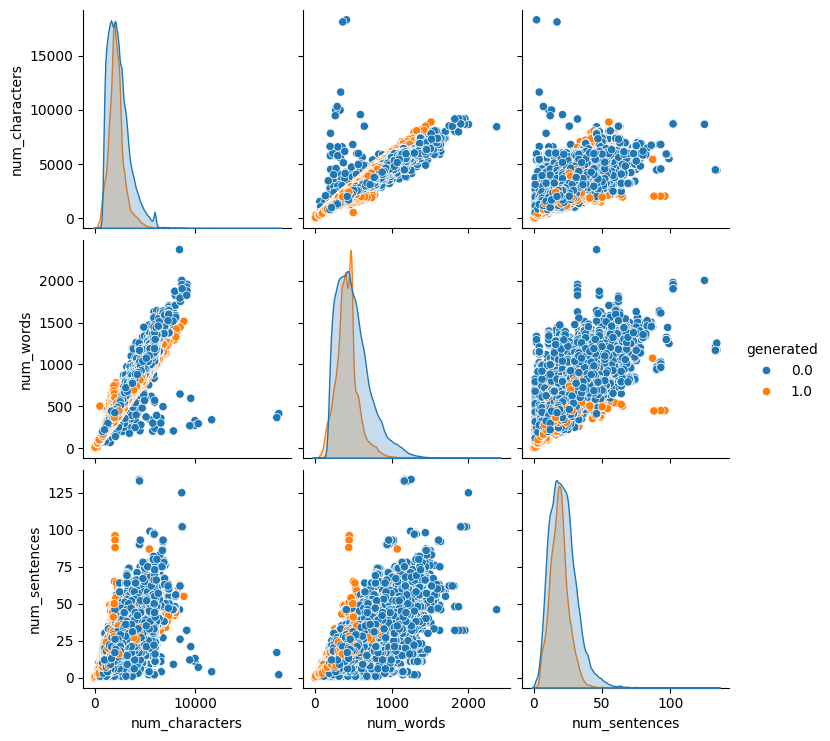

In [ ]:
sns.pairplot(df,hue="generated")

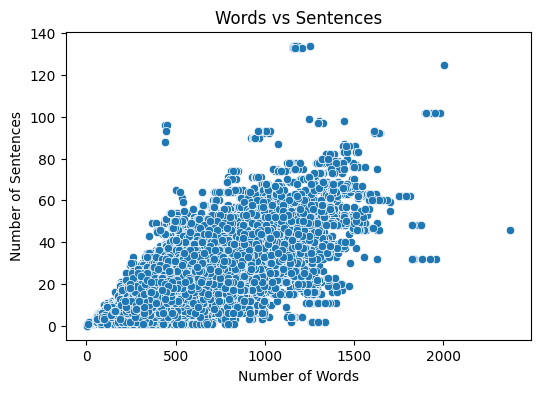

In [45]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='num_words', y='num_sentences', data=df)
plt.title('Words vs Sentences')
plt.xlabel('Number of Words')
plt.ylabel('Number of Sentences')
plt.show()

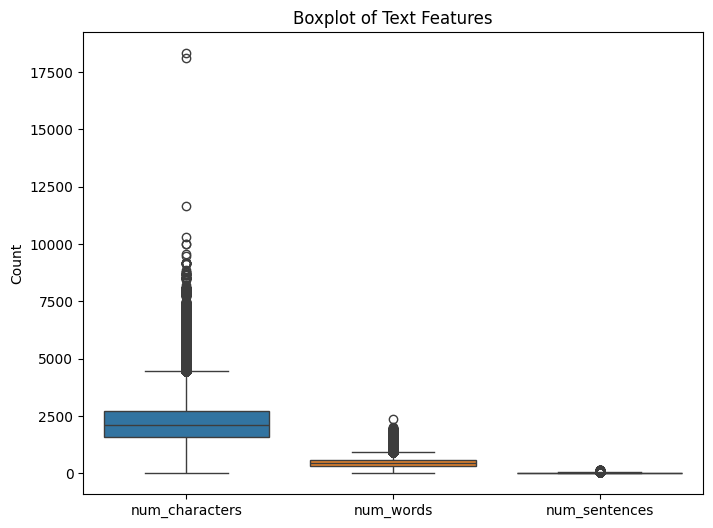

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['num_characters', 'num_words', 'num_sentences']])
plt.title('Boxplot of Text Features')
plt.ylabel('Count')
plt.show()

In [12]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stop_words = set(stopwords.words("english"))
punctuations = set(string.punctuation)
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /home/kashif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Cleaning, Removing StopWords, Punctuation etc

In [15]:
def transform_text(text):
    tokens = nltk.word_tokenize(text.lower())
    
    filtered_tokens = [
        ps.stem(token) for token in tokens 
        if token.isalnum() and token not in stop_words
    ]
    
    return " ".join(filtered_tokens)

In [16]:
import swifter
df['processed_text'] = df['text'].swifter.apply(transform_text)

Pandas Apply: 100%|████████████████████| 487235/487235 [36:32<00:00, 222.26it/s]


In [5]:
df.head()

,text,generated,num_characters,num_words,num_sentences,processed_text
0,Cars. Cars have been around since they became ...,0.0,3289,709,23,car car around sinc becam famou 1900 henri for...
1,Transportation is a large necessity in most co...,0.0,2738,569,27,transport larg necess countri worldwid doubt c...
2,"""America's love affair with it's vehicles seem...",0.0,4428,901,48,america love affair vehicl seem cool say elisa...
3,How often do you ride in a car? Do you drive a...,0.0,4013,852,47,often ride car drive one motor vehicl work sto...
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,1090,50,car wonder thing perhap one world greatest adv...


In [24]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [25]:
ai_wc = wc.generate(df[df["generated"]==1]["processed_text"].str.cat(sep=" "))

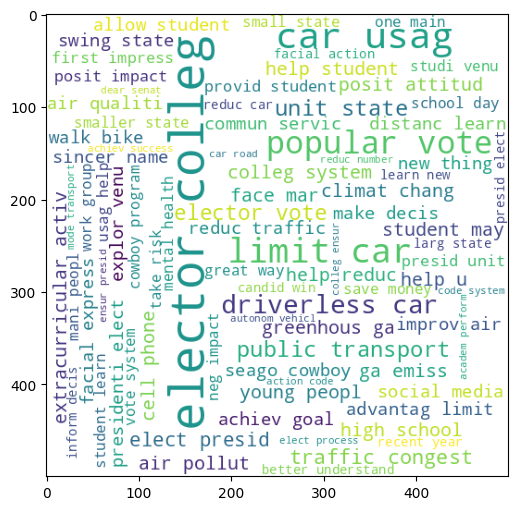

In [26]:
plt.figure(figsize=(12,6))
plt.imshow(ai_wc)

In [ ]:
human_wc = wc.generate(df[df["target"]==0]["transform_text"].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(human_wc)

In [57]:
df = df[["processed_text","generated"]]

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
df.dropna(inplace=True)

In [60]:
df.isnull().sum()

processed_text    0
generated         0
dtype: int64

In [61]:
df.duplicated().sum()

np.int64(0)

## Model Evaluation Train,Test Split

In [62]:
X = df["processed_text"]
y = df["generated"]

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000, min_df=5, max_df=0.8)

In [69]:
X = tfidf.fit_transform(df["processed_text"])

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## LogisticRegression

In [80]:
lr = LogisticRegression(max_iter=200)

In [81]:
lr.fit(X_train, y_train)

In [85]:
y_pred = model.predict(X_test)

In [157]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,ConfusionMatrixDisplay,roc_curve, auc

### Accuracy_Score

In [136]:
accuracy_score(y_test,y_pred)

0.9899520311963398

### f1_score

In [137]:
f1_score(y_test,y_pred)

0.987022649554306

### Confusion Matrix

In [139]:
confusion_matrix(y_test,y_pred)

array([[54868,   302],
       [  605, 34492]])

# RandomForestClassifier

In [93]:
clf = RandomForestClassifier()

In [94]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [146]:
y_pred1 = clf.predict(X_test)

In [147]:
accuracy_score(y_test,y_pred1)

0.9978840550810374

### Accuracy_Score

### f1_score

In [149]:
f1_score(y_test,y_pred1)

0.9972735707658269

### Confusion Matrix

In [150]:
confusion_matrix(y_test,y_pred1)

array([[55144,    26],
       [  165, 34932]])

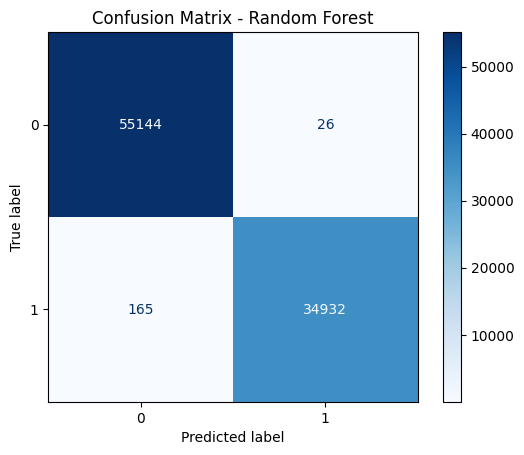

In [154]:
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

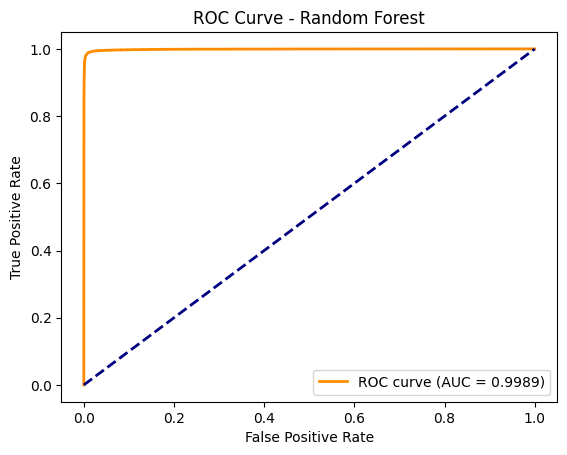

In [158]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

## Model Save

In [162]:
import joblib

model = joblib.dump(model, 'model.pkl')
wv = joblib.dump(tfidf, 'wv.pkl')